In [4]:
#import required packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
ABC_data = pd.read_csv(r'C:\Users\skhas\Desktop\Simpl\Simpl_data.csv')
ABC_data.drop(['address','email','asset_class_cd'], axis=1, inplace = True) # removing irrelevant and missing data columns

In [6]:
ABC_data.head(1000)
ABC_data.shape

(45222, 18)

In [7]:
#Null values in each attribute
print(ABC_data.isnull().sum())


user_id                    0
gender                     0
date_of_birth              0
workclass                  0
education_level            0
education_num              0
marital_status             0
occupation                 0
relationship               0
capital_gain               0
capital_loss               0
hours_per_week             0
approved                   0
inquiry_purpose_code    1291
institute_type             0
account_type               0
asset_code                82
portfolio_type             6
dtype: int64


In [8]:
# treating null values as a separate inquiry code
#impute a unique value for inquiry_purpose_code attribute
ABC_data['inquiry_purpose_code'].fillna(0 , inplace = True)

In [9]:
ABC_data.isnull().sum()

user_id                  0
gender                   0
date_of_birth            0
workclass                0
education_level          0
education_num            0
marital_status           0
occupation               0
relationship             0
capital_gain             0
capital_loss             0
hours_per_week           0
approved                 0
inquiry_purpose_code     0
institute_type           0
account_type             0
asset_code              82
portfolio_type           6
dtype: int64

In [10]:
#drop null value rows for attributes - asset_code and portfoli_type 
ABC_data.dropna(subset = ['asset_code','portfolio_type'], inplace = True)

In [11]:
ABC_data.isnull().sum()

user_id                 0
gender                  0
date_of_birth           0
workclass               0
education_level         0
education_num           0
marital_status          0
occupation              0
relationship            0
capital_gain            0
capital_loss            0
hours_per_week          0
approved                0
inquiry_purpose_code    0
institute_type          0
account_type            0
asset_code              0
portfolio_type          0
dtype: int64

In [12]:
ABC_data.shape

(45134, 18)

In [13]:
# convert DOB to Year of birth
ABC_data['year_of_birth'] = pd.DatetimeIndex(ABC_data['date_of_birth']).year
ABC_data.drop('date_of_birth', axis = 1, inplace = True)

In [14]:
ABC_data.dtypes

user_id                  object
gender                   object
workclass                object
education_level          object
education_num           float64
marital_status           object
occupation               object
relationship             object
capital_gain            float64
capital_loss            float64
hours_per_week          float64
approved                  int64
inquiry_purpose_code    float64
institute_type           object
account_type              int64
asset_code              float64
portfolio_type           object
year_of_birth             int64
dtype: object

# Correlation Analysis

In [15]:
# Coverting categorical variables into dummy variables
ABC_dummied_data = pd.get_dummies(ABC_data, columns = ['gender','workclass','marital_status','occupation','relationship','institute_type','portfolio_type' ],drop_first=True)
ABC_dummied_data.dtypes

user_id                                   object
education_level                           object
education_num                            float64
capital_gain                             float64
capital_loss                             float64
hours_per_week                           float64
approved                                   int64
inquiry_purpose_code                     float64
account_type                               int64
asset_code                               float64
year_of_birth                              int64
gender_ Male                               uint8
workclass_ Local-gov                       uint8
workclass_ Private                         uint8
workclass_ Self-emp-inc                    uint8
workclass_ Self-emp-not-inc                uint8
workclass_ State-gov                       uint8
workclass_ Without-pay                     uint8
marital_status_ Married-AF-spouse          uint8
marital_status_ Married-civ-spouse         uint8
marital_status_ Marr

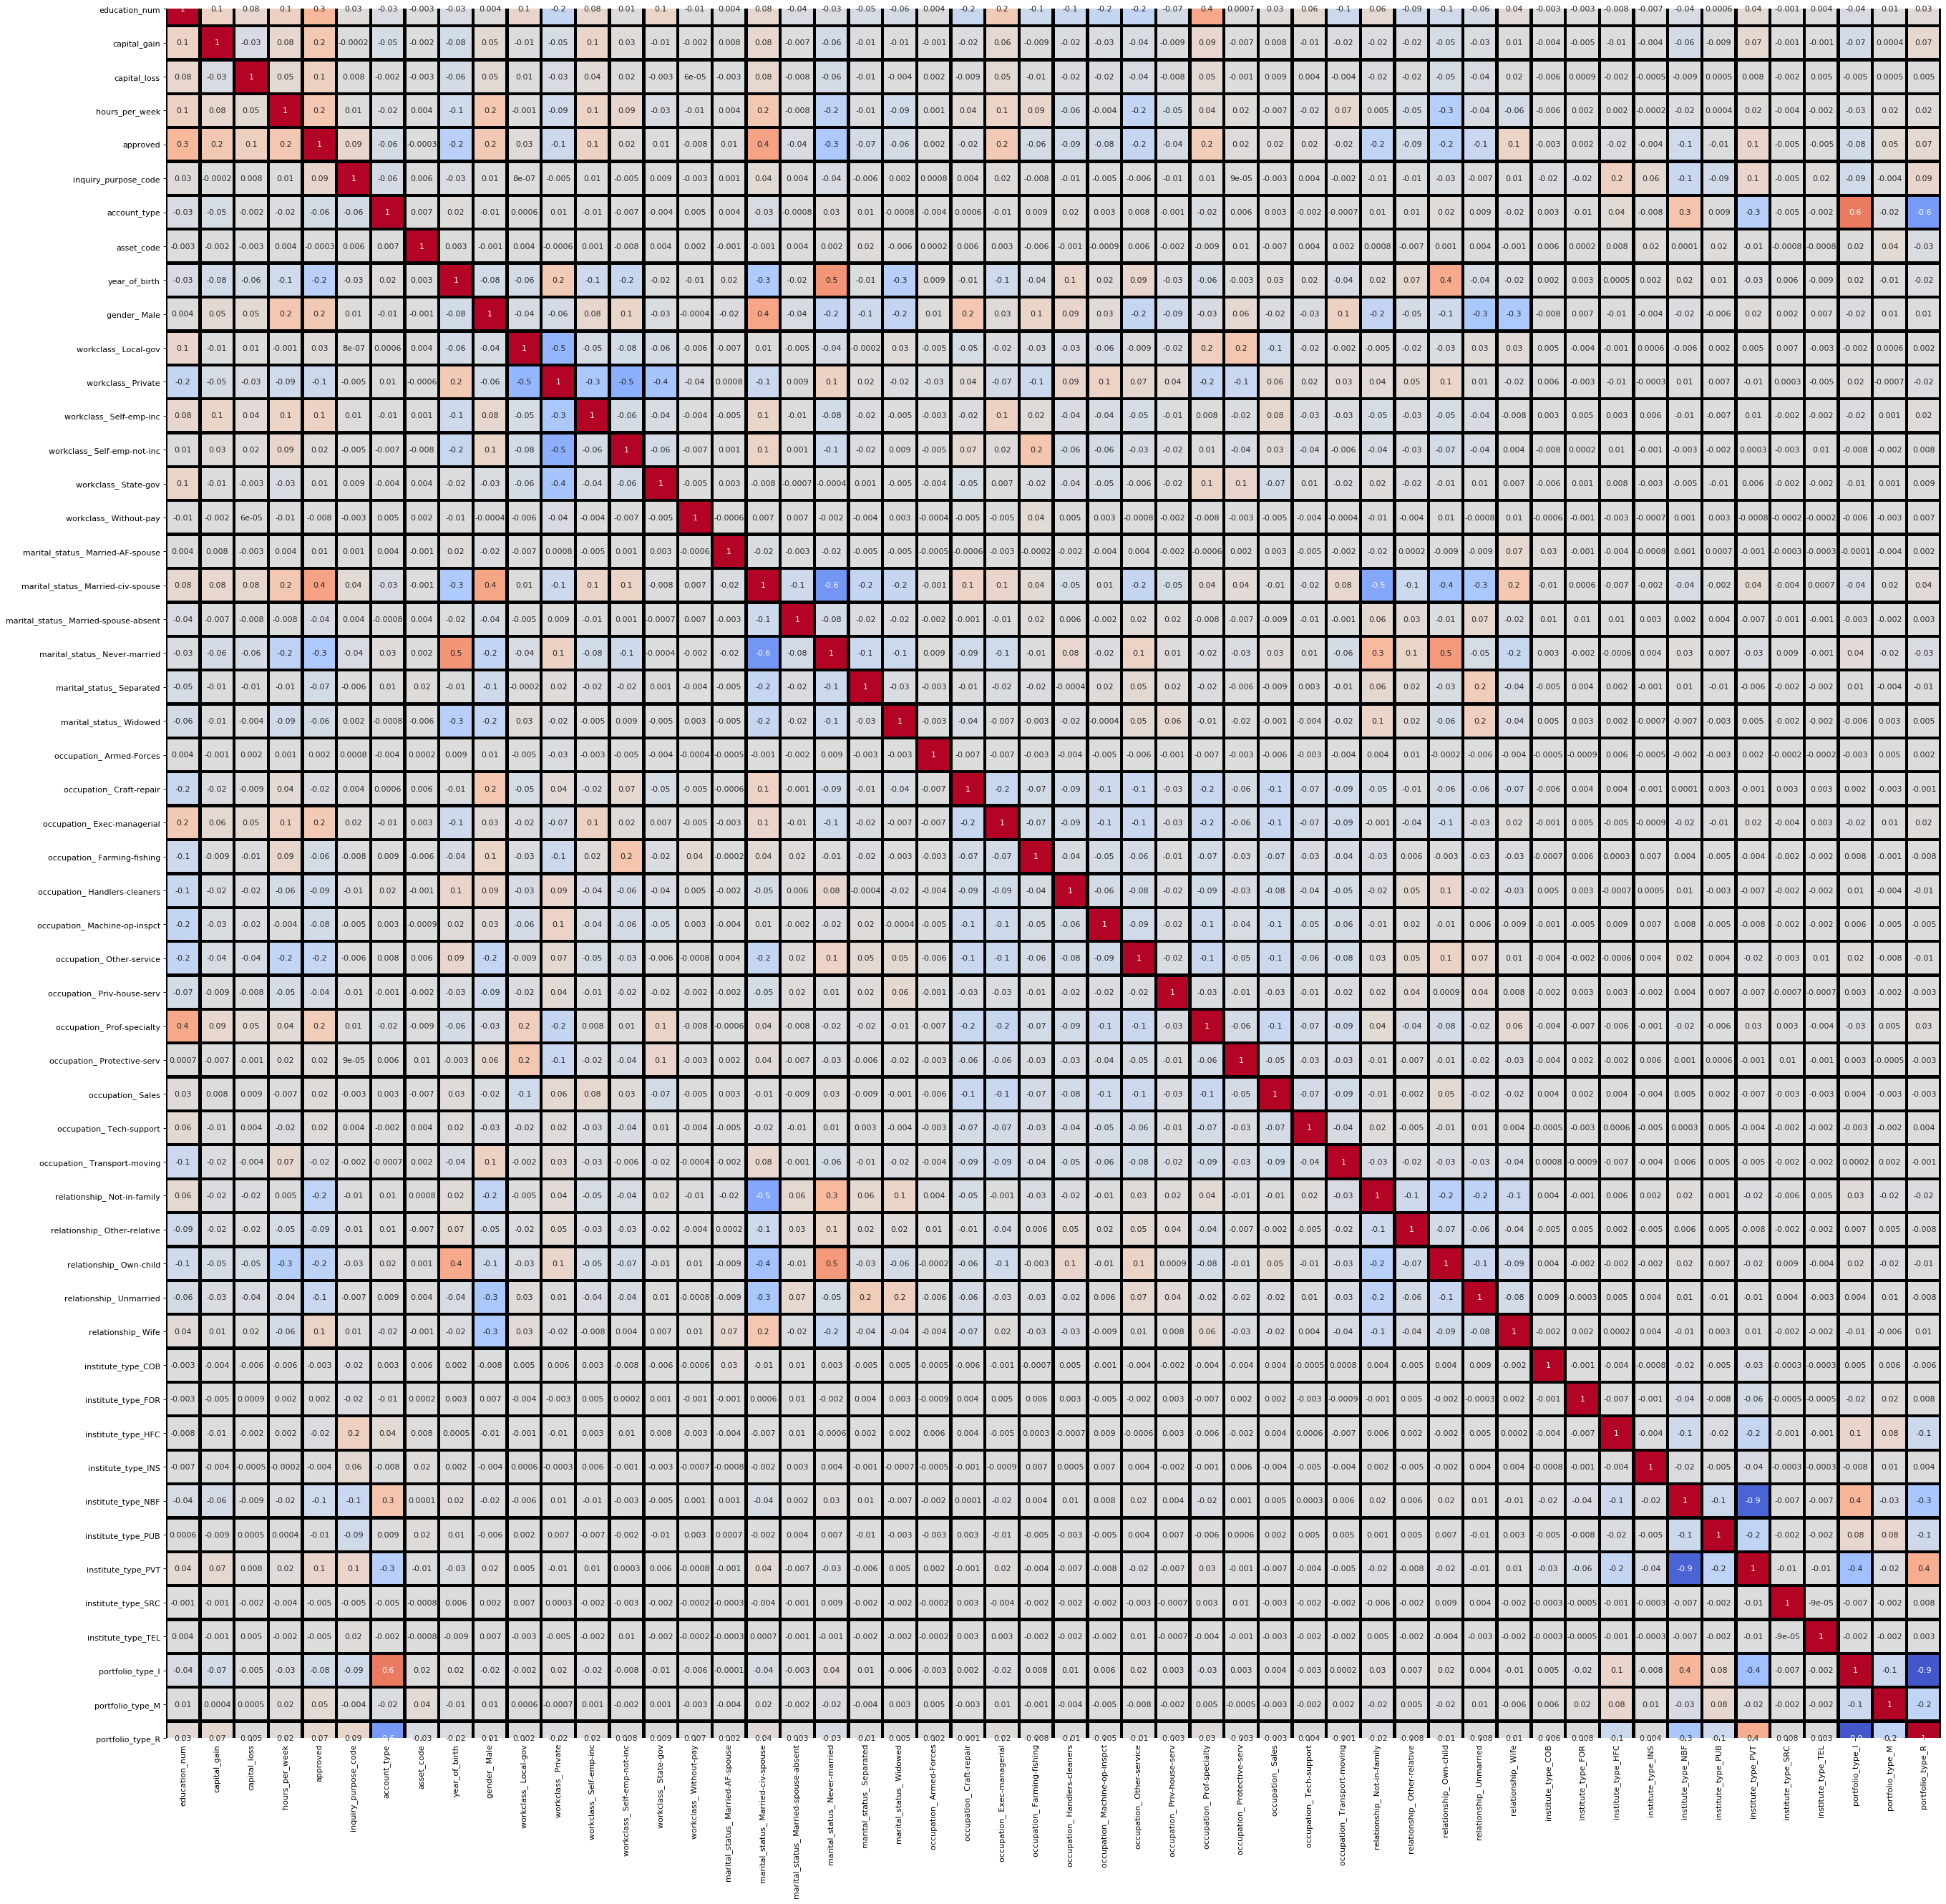

In [16]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(40, 40), dpi=80, facecolor='w', edgecolor='k')
sns.heatmap(ABC_dummied_data.corr(), annot = True, vmin=-1, vmax=1, center= 0, cbar = False, fmt = '.1g', cmap= 'coolwarm', linewidths=3, linecolor='black')

In [17]:
corr = pd.DataFrame(ABC_dummied_data.corr().unstack().sort_values().drop_duplicates(), columns = ['correlation'])
high_pos_corr = corr[(corr['correlation']>0.7)]

high_neg_corr = corr[(corr['correlation']<-0.7)]
print('Highly positive correlation attributes:\n',high_pos_corr,'\n \nHighly negative correlation attributes:\n',high_neg_corr)


Highly positive correlation attributes:
                              correlation
education_num education_num          1.0 
 
Highly negative correlation attributes:
                                        correlation
portfolio_type_I   portfolio_type_R      -0.947733
institute_type_PVT institute_type_NBF    -0.884093


In [18]:
# delete id, education_level and high correlated attributes 
ABC_dummied_data.drop(['user_id','education_level','institute_type_NBF','portfolio_type_R'], axis = 1, inplace = True)
ABC_dummied_data.dtypes

education_num                            float64
capital_gain                             float64
capital_loss                             float64
hours_per_week                           float64
approved                                   int64
inquiry_purpose_code                     float64
account_type                               int64
asset_code                               float64
year_of_birth                              int64
gender_ Male                               uint8
workclass_ Local-gov                       uint8
workclass_ Private                         uint8
workclass_ Self-emp-inc                    uint8
workclass_ Self-emp-not-inc                uint8
workclass_ State-gov                       uint8
workclass_ Without-pay                     uint8
marital_status_ Married-AF-spouse          uint8
marital_status_ Married-civ-spouse         uint8
marital_status_ Married-spouse-absent      uint8
marital_status_ Never-married              uint8
marital_status_ Sepa

In [19]:
# delete Id and repeated variable education_level
ABC_orig_data = ABC_data.drop(['user_id','education_level'], axis = 1)
ABC_orig_data

,gender,workclass,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,approved,inquiry_purpose_code,institute_type,account_type,asset_code,portfolio_type,year_of_birth
0,Female,Private,7.0,Never-married,Sales,Unmarried,0.0,0.0,17.0,0,7.0,PVT,5,1.0,R,1987
1,Male,Self-emp-not-inc,10.0,Married-civ-spouse,Craft-repair,Husband,0.0,0.0,48.0,0,13.0,NBF,5,1.0,R,1970
2,Male,Private,9.0,Divorced,Sales,Not-in-family,0.0,0.0,50.0,0,13.0,NBF,5,1.0,R,1973
3,Female,Private,7.0,Never-married,Sales,Own-child,0.0,0.0,15.0,0,13.0,NBF,5,1.0,R,2001
4,Male,Private,10.0,Married-civ-spouse,Handlers-cleaners,Husband,0.0,0.0,50.0,0,13.0,PVT,47,1.0,I,1986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,Male,Private,15.0,Married-civ-spouse,Prof-specialty,Husband,99999.0,0.0,60.0,1,7.0,PVT,5,1.0,R,1976
45218,Male,Private,15.0,Married-spouse-absent,Prof-specialty,Not-in-family,99999.0,0.0,40.0,1,7.0,PVT,5,1.0,R,1977
45219,Male,Self-emp-inc,15.0,Married-civ-spouse,Prof-specialty,Husband,99999.0,0.0,45.0,1,13.0,NBF,189,1.0,I,1964
45220,Male,Private,13.0,Married-civ-spouse,Craft-repair,Husband,99999.0,0.0,40.0,1,7.0,PVT,5,1.0,R,1979


# Exploratory Data Analysis (EDA)

### Approved EDA

0    33950
1    11184
Name: approved, dtype: int64


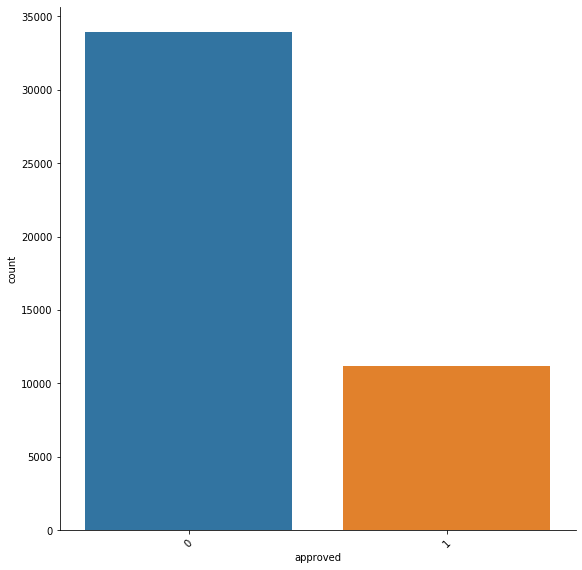

In [20]:
approved_plot = sns.catplot(x="approved",
                data=ABC_orig_data, kind="count",
                height=8);
print(ABC_orig_data['approved'].value_counts())
approved_plot.set_xticklabels(rotation=45)

# not an imbalanced class

### Gender EDA

 Male      30465
 Female    14669
Name: gender, dtype: int64


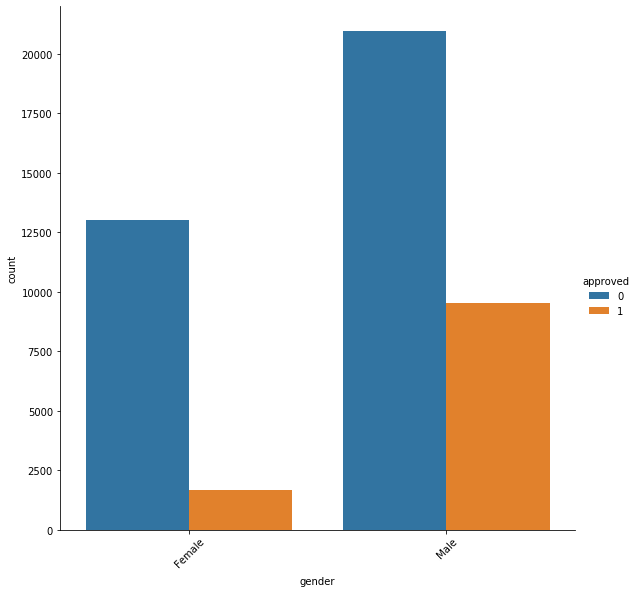

In [21]:
gender_plot = sns.catplot(x="gender", hue="approved",
                data=ABC_orig_data, kind="count",
                height=8);
print(ABC_orig_data['gender'].value_counts())
gender_plot.set_xticklabels(rotation=45)

### Workclass EDA




 Private             33247
 Self-emp-not-inc     3784
 Local-gov            3089
 State-gov            1944
 Self-emp-inc         1644
 Federal-gov          1405
 Without-pay            21
Name: workclass, dtype: int64


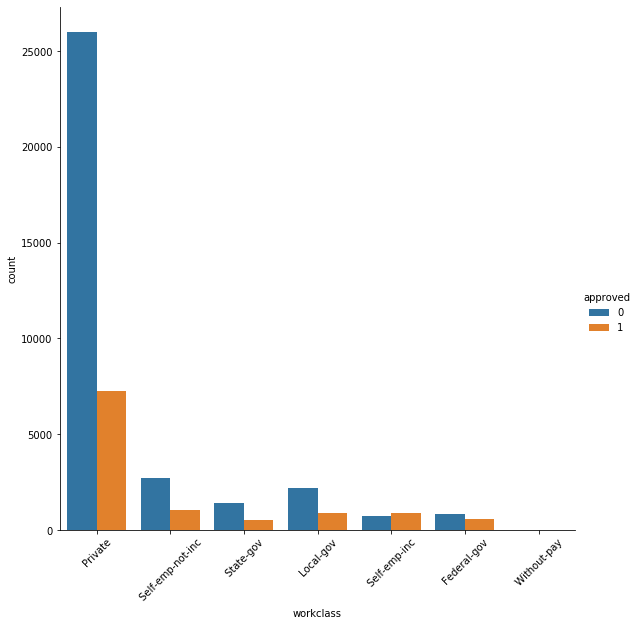

In [22]:
workclass_plot = sns.catplot(x="workclass", hue="approved",
                data=ABC_orig_data, kind="count",
                height=8);
print(ABC_orig_data['workclass'].value_counts())
workclass_plot.set_xticklabels(rotation=45)

In [23]:
# Most of the users belong to the private workclass

### education_level EDA


9.0     14757
10.0     9878
13.0     7553
14.0     2510
11.0     1953
7.0      1617
12.0     1505
6.0      1223
4.0       820
15.0      782
5.0       675
8.0       575
16.0      543
3.0       449
2.0       222
1.0        72
Name: education_num, dtype: int64


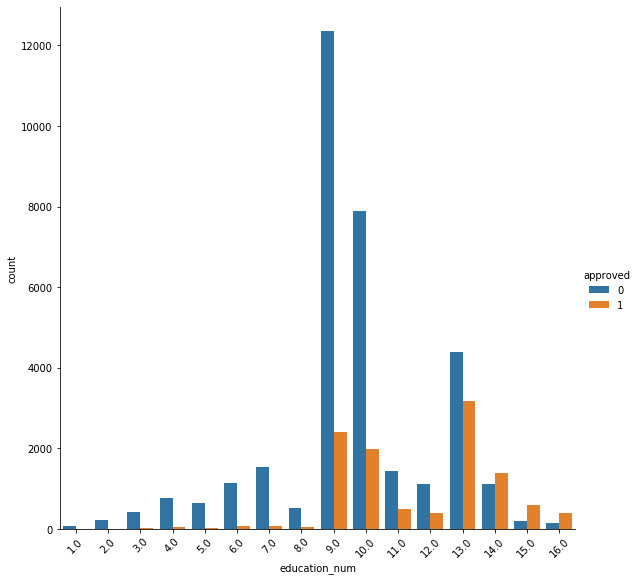

In [24]:
ed_num_plot = sns.catplot(x="education_num", hue="approved",
                data=ABC_orig_data, kind="count",
                height=8);
print(ABC_orig_data['education_num'].value_counts())
ed_num_plot.set_xticklabels(rotation=45)

### Marital status EDA

 Married-civ-spouse       21010
 Never-married            14573
 Divorced                  6285
 Separated                 1409
 Widowed                   1274
 Married-spouse-absent      551
 Married-AF-spouse           32
Name: marital_status, dtype: int64


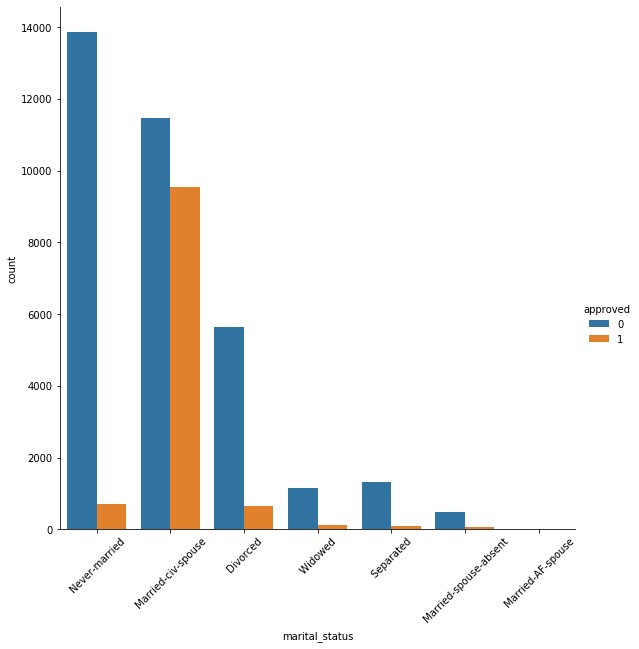

In [25]:
marital_status_plot = sns.catplot(x="marital_status", hue="approved",
                data=ABC_orig_data, kind="count",
                height=8);
print(ABC_orig_data['marital_status'].value_counts())
marital_status_plot.set_xticklabels(rotation=45)

In [26]:
# Majority of the 'Never-maried' people are approved
# Most of the people are Married-civ-spouse

### Occupation EDA

 Craft-repair         6010
 Prof-specialty       5995
 Exec-managerial      5975
 Adm-clerical         5531
 Sales                5392
 Other-service        4797
 Machine-op-inspct    2966
 Transport-moving     2311
 Handlers-cleaners    2041
 Farming-fishing      1479
 Tech-support         1417
 Protective-serv       974
 Priv-house-serv       232
 Armed-Forces           14
Name: occupation, dtype: int64


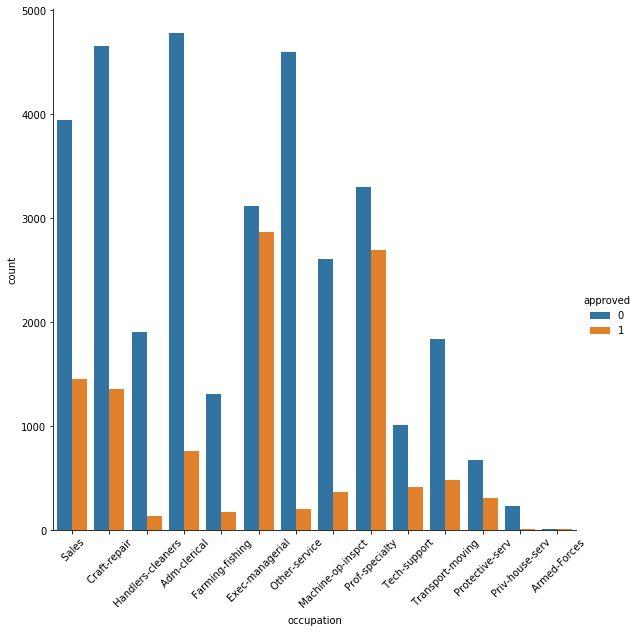

In [27]:
occupation_plot = sns.catplot(x="occupation", hue="approved",
                data=ABC_orig_data, kind="count",
                height=8);
print(ABC_orig_data['occupation'].value_counts())
occupation_plot.set_xticklabels(rotation=45)

### Relationship EDA


 Husband           18627
 Not-in-family     11679
 Own-child          6613
 Unmarried          4783
 Wife               2085
 Other-relative     1347
Name: relationship, dtype: int64


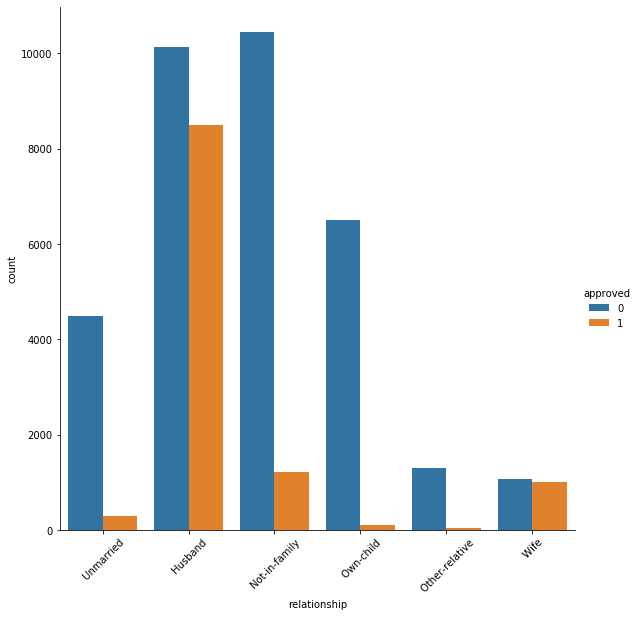

In [28]:
relationship_plot = sns.catplot(x="relationship", hue="approved",
                data=ABC_orig_data, kind="count",
                height=8);
print(ABC_orig_data['relationship'].value_counts())
relationship_plot.set_xticklabels(rotation=45)

In [29]:
# Most individuals are husbands
# Majority people with own-child are not approved 

### Institute_type EDA

PVT    26624
NBF    15891
PUB     1222
HFC      904
BRO      303
FOR      106
INS       41
COB       35
TEL        4
SRC        4
Name: institute_type, dtype: int64


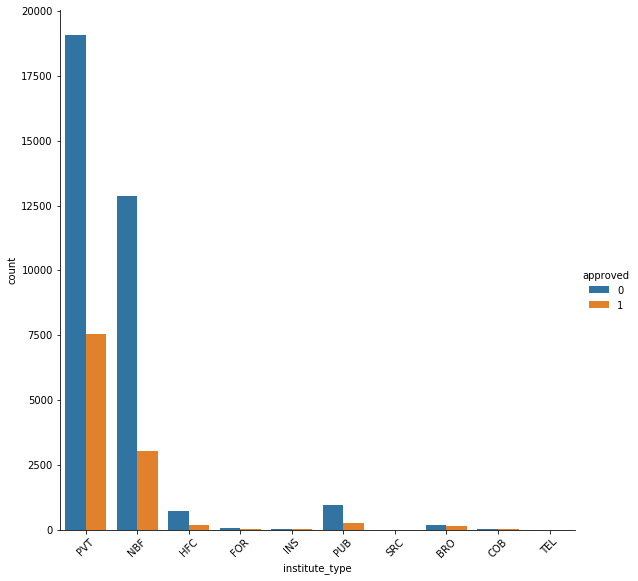

In [30]:
institute_plot = sns.catplot(x="institute_type", hue="approved",
                data=ABC_orig_data, kind="count",
                height=8);
print(ABC_orig_data['institute_type'].value_counts())
institute_plot.set_xticklabels(rotation=45)

### Portfolio_type EDA

R    26934
I    17047
M     1138
F       15
Name: portfolio_type, dtype: int64


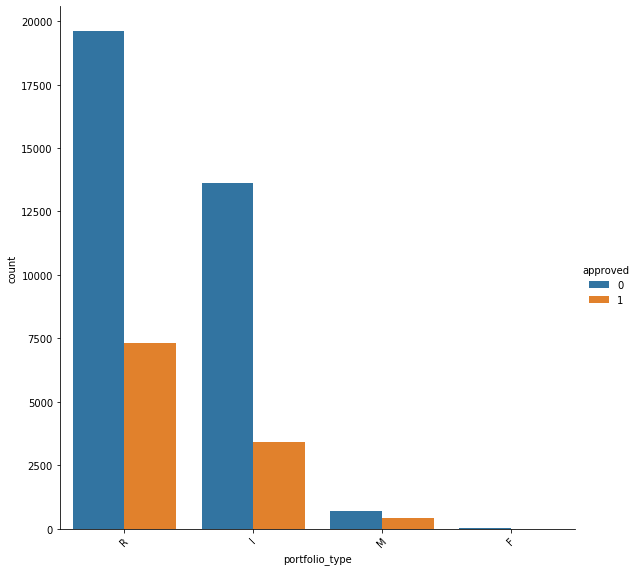

In [31]:
portfolio_plot = sns.catplot(x="portfolio_type", hue="approved",
                data=ABC_orig_data, kind="count",
                height=8);
print(ABC_orig_data['portfolio_type'].value_counts())
portfolio_plot.set_xticklabels(rotation=45)

### Capital_gain vs Approved

[    0.   114.   401.   594.   914.   991.  1055.  1086.  1151.  1173.
  1264.  1409.  1424.  1455.  1471.  1506.  1639.  1731.  1797.  1831.
  1848.  2009.  2036.  2050.  2062.  2105.  2174.  2176.  2202.  2228.
  2290.  2329.  2346.  2354.  2387.  2407.  2414.  2463.  2538.  2580.
  2597.  2635.  2653.  2829.  2885.  2907.  2936.  2961.  2964.  2977.
  2993.  3103.  3137.  3273.  3325.  3411.  3418.  3432.  3456.  3464.
  3471.  3674.  3781.  3818.  3887.  3908.  3942.  4064.  4101.  4386.
  4416.  4508.  4650.  4865.  4931.  5013.  5060.  5455.  5721.  6360.
  6497.  6723.  6767.  6849.  7443.  7896.  7978. 10566. 22040. 34095.
 41310.  4687.  4787.  4934.  5178.  5556.  6097.  6418.  6514.  7262.
  7298.  7430.  7688.  8614.  9386.  9562. 10520. 10605. 11678. 13550.
 14084. 14344. 15020. 15024. 15831. 18481. 20051. 25124. 25236. 27828.
 99999.]
float64


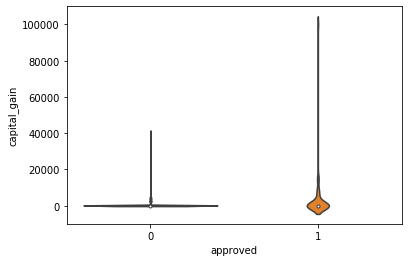

In [32]:
sns.violinplot(x='approved', y='capital_gain', data=ABC_orig_data, scale = 'area')
print(ABC_orig_data['capital_gain'].unique())
print(ABC_orig_data['capital_gain'].dtype)

### Year of Birth EDA

[1987 1970 1973 2001 1986 1956 1996 1977 1963 1997 1988 1999 1993 1983
 1968 1981 1992 1982 1976 1969 1995 1975 2002 1946 1990 1964 1978 1980
 1998 1985 1966 1961 2000 1991 1979 1989 1958 1962 1994 1955 1984 1951
 1974 1954 1959 1971 1965 1960 1952 1972 1967 1957 1950 1949 1930 1953
 1948 1945 1947 1939 1942 1938 1943 1940 1935 1944 1932 1934 1941 1936
 1937 1933 1931]
int64


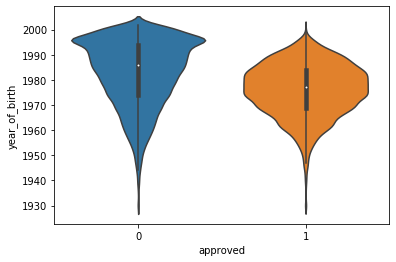

In [33]:
sns.violinplot(x='approved', y='year_of_birth', data=ABC_orig_data, scale = 'area')
print(ABC_orig_data['year_of_birth'].unique())
print(ABC_orig_data['year_of_birth'].dtype)

### Capital_loss vs Approved

[   0. 1876. 1719. 1485. 1602. 1740. 1340. 1721. 2051. 1974. 1741. 1579.
 1380. 2001. 2002. 2267. 2057. 1669. 1092. 1628. 1672. 1617. 1902. 1594.
 1590. 1980. 2377. 1573.  625. 2179. 2754. 2258. 1504. 1408.  213. 1668.
 1651. 1429. 1258. 2205. 2042. 2339. 1726. 1762. 1411.  323.  880. 2467.
 3683. 3900. 2129. 2238. 2603. 2206. 1648. 1944. 2149. 1844. 1138. 1510.
 3175. 3770. 2163. 1735. 1870. 1421. 2457.  653.  974. 1539. 2352. 1816.
  810.  155.  419. 2080. 4356. 1887. 2415. 1977. 2174. 2824. 2392. 2444.
 1848. 2246. 1564. 2559. 2472. 2231. 2547. 3004. 1755. 1825. 2201. 2282.
 1911.]
float64


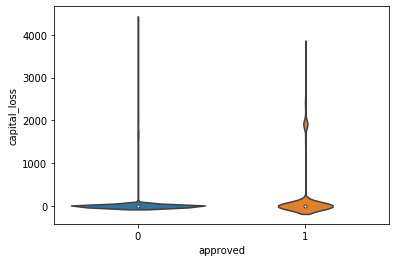

In [34]:
sns.violinplot(x='approved', y='capital_loss', data=ABC_orig_data, scale = 'area')
print(ABC_orig_data['capital_loss'].unique())
print(ABC_orig_data['capital_loss'].dtype)

### Hours_per_week vs Approved

[17. 48. 50. 15.  8. 24. 45. 40. 36. 25. 55. 12.  4. 52. 20. 22. 60. 44.
 11. 42. 35. 30. 10. 38. 57.  2. 46.  5. 70. 37. 43. 32. 33. 26. 78. 18.
 75. 65. 16. 68. 72. 96. 99. 56. 54.  3. 77. 23. 28. 90. 34. 80. 27. 47.
 66. 85.  7.  9. 95. 59.  6. 84. 58. 64. 14. 49. 91. 53. 21. 51. 39.  1.
 92. 31. 62. 41. 98. 81. 76. 19. 74. 13. 63. 29. 86. 67. 88. 73. 79. 97.
 82. 87. 89. 94. 61. 69.]
float64


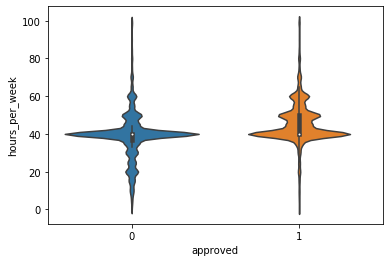

In [35]:
sns.violinplot(x='approved', y='hours_per_week', data=ABC_orig_data, scale = 'area')
print(ABC_orig_data['hours_per_week'].unique())
print(ABC_orig_data['hours_per_week'].dtype)

### Inquiry_purpose_code vs Approved

[ 7. 13. 99. 14. 10. 16.  2.  0.  1.  6.  5. 11.  8.  4.  3.  9. 12. 18.
 17.]
float64


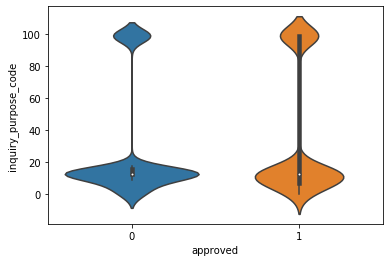

In [36]:
sns.violinplot(x='approved', y='inquiry_purpose_code', data=ABC_orig_data, scale = 'area')
print(ABC_orig_data['inquiry_purpose_code'].unique())
print(ABC_orig_data['inquiry_purpose_code'].dtype)

### Inquiry_purpose_code vs Approved


[ 1.  4.  2. 19.]
float64


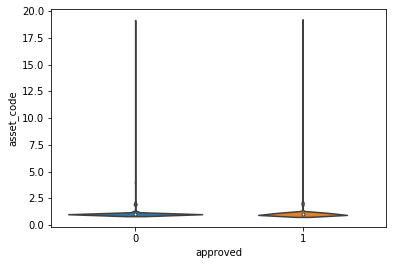

In [37]:
sns.violinplot(x='approved', y='asset_code', data=ABC_orig_data, scale = 'area')
print(ABC_orig_data['asset_code'].unique())
print(ABC_orig_data['asset_code'].dtype)

# Machine Learning modelling

In [38]:
import sklearn
from sklearn import linear_model
from sklearn.model_selection import train_test_split

### Splitting original data into train and test dataset

In [39]:
ABC_indep = ABC_orig_data.drop(['approved'],axis = 1)
ABC_dep = ABC_orig_data['approved']

In [40]:
Xorig_train, Xorig_test, yorig_train, yorig_test = train_test_split(ABC_indep, ABC_dep, test_size=0.3, random_state=0)

In [41]:
Xorig_train.shape, yorig_train.shape

((31593, 15), (31593,))

In [42]:
Xorig_test.shape, yorig_test.shape

((13541, 15), (13541,))

### Splitting dummied data into train and test datasets

In [43]:
ABC_dummied_indep = ABC_dummied_data.drop(['approved'],axis = 1)
ABC_dummied_dep = ABC_dummied_data['approved']

In [44]:
Xdummied_train, Xdummied_test, ydummied_train, ydummied_test = train_test_split(ABC_dummied_indep, ABC_dummied_dep, test_size=0.3, random_state=0)

In [45]:
Xdummied_train.shape, ydummied_train.shape

((31593, 49), (31593,))

In [46]:
Xdummied_test.shape, ydummied_test.shape

((13541, 49), (13541,))

# Solution - Part A

## Machine Learning modelling

In [47]:
from sklearn.linear_model import LogisticRegressionCV
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Perceptron
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score

y_true = np.array(ydummied_test)


### Logistic regression 

In [48]:
# Fitting the Logistic Regression model to dummied dataset
logR_clf = LogisticRegressionCV(cv=8, random_state=0,n_jobs=-1)
logR_clf.fit(Xdummied_train, ydummied_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=8, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='warn', n_jobs=-1, penalty='l2',
                     random_state=0, refit=True, scoring=None, solver='lbfgs',
                     tol=0.0001, verbose=0)

In [49]:
# Making predictons based on the fitted model
y_logR_predict = logR_clf.predict(Xdummied_test)
y_logR_proba = logR_clf.predict_proba(Xdummied_test)
print(y_logR_predict)
print(ydummied_test)

[0 0 0 ... 0 0 0]
84       0
37083    1
25482    0
29889    0
30055    0
        ..
43493    1
11656    0
24851    0
8337     0
14079    0
Name: approved, Length: 13541, dtype: int64


In [50]:
# Probabilities for test class prediction
y_logR_proba = pd.DataFrame(logR_clf.predict_proba(Xdummied_test), columns = ['Class 1 Prob', 'Class 0 Prob'])
print(y_logR_proba)
print(y_logR_proba.shape)

       Class 1 Prob  Class 0 Prob
0          0.854500      0.145500
1          0.897947      0.102053
2          0.699952      0.300048
3          0.992816      0.007184
4          0.999165      0.000835
...             ...           ...
13536      0.083972      0.916028
13537      0.767668      0.232332
13538      0.791970      0.208030
13539      0.927653      0.072347
13540      0.996082      0.003918

[13541 rows x 2 columns]
(13541, 2)


In [51]:
# Calculating final applied probability
# Set non-approved probabilities to 0 and the rest to Class 1 probabilities.
y_logR_proba['approvedLR_prob'] = np.where(y_logR_proba['Class 1 Prob']>y_logR_proba['Class 0 Prob'], y_logR_proba['Class 1 Prob'],0)
print(y_logR_proba)

       Class 1 Prob  Class 0 Prob  approvedLR_prob
0          0.854500      0.145500         0.854500
1          0.897947      0.102053         0.897947
2          0.699952      0.300048         0.699952
3          0.992816      0.007184         0.992816
4          0.999165      0.000835         0.999165
...             ...           ...              ...
13536      0.083972      0.916028         0.000000
13537      0.767668      0.232332         0.767668
13538      0.791970      0.208030         0.791970
13539      0.927653      0.072347         0.927653
13540      0.996082      0.003918         0.996082

[13541 rows x 3 columns]


In [52]:
confusion_matrix(y_true, y_logR_predict)
print('Model prediction accuracy is \n:', accuracy_score(y_true, y_logR_predict))

Model prediction accuracy is 
: 0.846909386308249


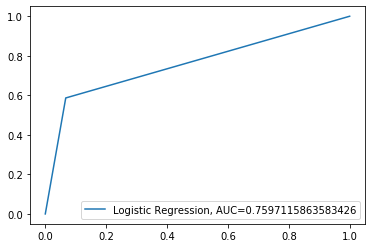

In [53]:
# Plot AUC curve for Logistic regression model
fpr, tpr, threshold = metrics.roc_curve(y_true,  y_logR_predict)
auc = metrics.roc_auc_score(ydummied_test, y_logR_predict)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))
plt.legend(loc=4)
plt.show();

### Single Perceptron

In [54]:
Perceptron_clf = Perceptron(random_state=0,n_jobs=-1)
Perceptron_clf.fit(Xdummied_train, ydummied_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=-1,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [55]:
y_Perceptron_predict = Perceptron_clf.predict(Xdummied_test)
print(y_Perceptron_predict)

[0 0 1 ... 0 0 0]


In [56]:
confusion_matrix(y_true, y_Perceptron_predict)
accuracy_score(y_true, y_Perceptron_predict)

0.7514954582379441

In [57]:
# Not a linearly separable classification problem as accuracy is pretty low

### Random Forest Classifier (dummied data)

In [58]:
RF_clf = RandomForestClassifier(random_state=0,n_jobs=-1)
RF_clf.fit(Xdummied_train, ydummied_train)
col_names = Xdummied_train.columns
rank = RF_clf.feature_importances_
features_dict = dict(zip(np.argsort(rank),col_names))
print(features_dict)  # Ranking the importance of features

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


{46: 'education_num', 45: 'capital_gain', 14: 'capital_loss', 28: 'hours_per_week', 21: 'inquiry_purpose_code', 39: 'account_type', 42: 'asset_code', 15: 'year_of_birth', 40: 'gender_ Male', 17: 'workclass_ Local-gov', 20: 'workclass_ Private', 35: 'workclass_ Self-emp-inc', 19: 'workclass_ Self-emp-not-inc', 41: 'workclass_ State-gov', 43: 'workclass_ Without-pay', 30: 'marital_status_ Married-AF-spouse', 25: 'marital_status_ Married-civ-spouse', 48: 'marital_status_ Married-spouse-absent', 13: 'marital_status_ Never-married', 26: 'marital_status_ Separated', 6: 'marital_status_ Widowed', 24: 'occupation_ Armed-Forces', 32: 'occupation_ Craft-repair', 11: 'occupation_ Exec-managerial', 33: 'occupation_ Farming-fishing', 9: 'occupation_ Handlers-cleaners', 36: 'occupation_ Machine-op-inspct', 22: 'occupation_ Other-service', 27: 'occupation_ Priv-house-serv', 12: 'occupation_ Prof-specialty', 37: 'occupation_ Protective-serv', 38: 'occupation_ Sales', 31: 'occupation_ Tech-support', 47

In [59]:
# Predicting the classes using RF model
y_RF_predict = RF_clf.predict(Xdummied_test)
print(y_RF_predict)

[0 0 0 ... 0 0 0]


In [72]:
print(confusion_matrix(y_true, y_RF_predict))
print('Random Forest model accurcy is:n',accuracy_score(y_true, y_RF_predict))

[[9472  709]
 [1291 2069]]
Random Forest model accurcy is:n 0.8523004209438003


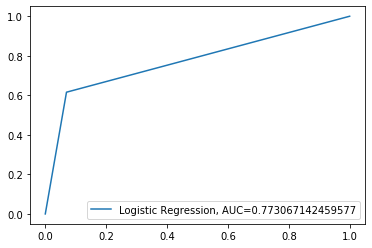

In [73]:
fpr, tpr, threshold = metrics.roc_curve(y_true,  y_RF_predict)
auc = metrics.roc_auc_score(ydummied_test, y_RF_predict)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))
plt.legend(loc=4)
plt.show();

In [74]:
# recall score
recall_score(ydummied_test, y_RF_predict, average='macro')

0.773067142459577

In [75]:
y_RF_proba = pd.DataFrame(RF_clf.predict_proba(Xdummied_test), columns = ['Class 1 prob','Class 0 prob']) 
print(y_RF_proba)

       Class 1 prob  Class 0 prob
0               0.9           0.1
1               0.9           0.1
2               0.6           0.4
3               1.0           0.0
4               1.0           0.0
...             ...           ...
13536           0.0           1.0
13537           1.0           0.0
13538           1.0           0.0
13539           1.0           0.0
13540           1.0           0.0

[13541 rows x 2 columns]


In [76]:
# find the approved probabilities with RF calssifier
# Set non-approved probabilities to 0 and rest to Class 1 probabilities.
y_RF_proba['approvedRF_prob'] = np.where(y_RF_proba['Class 1 prob']>y_RF_proba['Class 0 prob'], y_RF_proba['Class 1 prob'], 0)
y_RF_proba

,Class 1 prob,Class 0 prob,approvedRF_prob
0,0.9,0.1,0.9
1,0.9,0.1,0.9
2,0.6,0.4,0.6
3,1.0,0.0,1.0
4,1.0,0.0,1.0
...,...,...,...
13536,0.0,1.0,0.0
13537,1.0,0.0,1.0
13538,1.0,0.0,1.0
13539,1.0,0.0,1.0


In [77]:
# overall aim of the model should be to improve true positive prediction accuracy i.e. Recall score

# Solution - Part B


In [78]:
print('Probability of approved individuals obtained through Logitic Regression model:\n', y_logR_proba['approvedLR_prob'])


Probability of approved individuals obtained through Logitic Regression model:
 0        0.854500
1        0.897947
2        0.699952
3        0.992816
4        0.999165
           ...   
13536    0.000000
13537    0.767668
13538    0.791970
13539    0.927653
13540    0.996082
Name: approvedLR_prob, Length: 13541, dtype: float64


In [79]:
print('Probability of approved individuals obtained through Random Forest model:\n', y_RF_proba['approvedRF_prob'])


Probability of approved individuals obtained through Random Forest model:
 0        0.9
1        0.9
2        0.6
3        1.0
4        1.0
        ... 
13536    0.0
13537    1.0
13538    1.0
13539    1.0
13540    1.0
Name: approvedRF_prob, Length: 13541, dtype: float64


In [80]:
credit_limit_min = 1000
credit_limit_max = 8000
print('Credit Limit range : $', credit_limit_min , '-', credit_limit_max)

Credit Limit range : $ 1000 - 8000


In [81]:
# Credit Limit based on Logistic Regression model
LR_credit_limit =  y_logR_proba['approvedLR_prob']*credit_limit_max
print('Individual Credit Limit (based on Logistic Regression model):\n', LR_credit_limit)

Individual Credit Limit (based on Logistic Regression model):
 0        6836.000522
1        7183.572214
2        5599.617716
3        7942.525956
4        7993.323868
            ...     
13536       0.000000
13537    6141.346768
13538    6335.756636
13539    7421.221990
13540    7968.653092
Name: approvedLR_prob, Length: 13541, dtype: float64


In [82]:
# Credit Limit based on Random Forest Classifier model
RF_credit_limit =  y_RF_proba['approvedRF_prob']*credit_limit_max
print('Individual Credit Limit (based on Logistic Regression model):\n', RF_credit_limit)


Individual Credit Limit (based on Logistic Regression model):
 0        7200.0
1        7200.0
2        4800.0
3        8000.0
4        8000.0
          ...  
13536       0.0
13537    8000.0
13538    8000.0
13539    8000.0
13540    8000.0
Name: approvedRF_prob, Length: 13541, dtype: float64
